
   #                Analisando Preço de Combustível no Brasil (2004-2019)

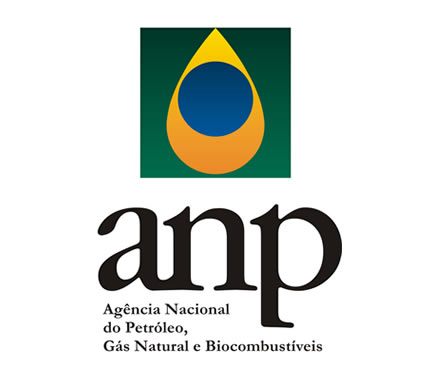                                                                       
____________


### Autor: Rodrigo Brust

#### [Linkedin](https://www.linkedin.com/in/rodrigobrust/) | [Github](https://github.com/rodreras)
***

### Sumário

`1.`[Introdução](#intro)

`2.`[Importando os dados](#importando)

`3.`[Limpando os dados](#clean)
    
> `3.1`[Problemas envolvendo qualidade](#quality)

> `3.2`[Problemas envolvendo arrumação](#tidiness)

`4.`[Analisado os Dados](#dados)

_____________________________

<a id='intro'></a>

### Introdução
Esse notebook tem o objetivo de ver a evolução dos preços desde 2004 até 2019.

Tipos de combustíveis: 
- Gasolina
- GNV
- Etanol
- Diesel


Os dados são atualizados pela `ANP`semanalmente, em vários postos cadastrados em todo país. 

A ideia é visualizar os dados em questão temporal e espacial, conforme lista abaixo: 

- Evolução dos preços no país por ano 
- Evolução dos preços por estado por ano
- Evolução dos preços por estado por ano 
- Distribuição dos valores em boxplot.

#### Estruturação desse notebook

1. Primeiro faremos o reconhecimento do documento, para entender falhas, colunas, e as informações gerais.
2. Em seguida, iremos realizar a limpeza do arquivo em um arquivo separado.
3. Depois inicializaremos as análises.
4. Por último, haverão as considerações finais.


<a id='importando'></a>
### Importando os dados

In [126]:
#Importando as bibliotecas que serão utilizadas para essa análise
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import numpy as np
import matplotlib.dates as mdates
import seaborn as sb
import geopandas as gpd
from datetime import timedelta
import warnings
import warnings
warnings.simplefilter("ignore")

%matplotlib inline 

In [2]:
#Importando o arquivo
df_gas = pd.read_csv("2004-2019.tsv", sep ='\t',index_col=[0]) 
#\t significa que é um tabspace. É necessário pois o arquivo é separado por tabulações

In [3]:
df_gas.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


In [4]:
#Vendo as dimensões do arquivo
df_gas.shape

(106823, 20)

In [5]:
#Checando os data types.
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106823 entries, 0 to 106822
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   106823 non-null  object 
 1   DATA FINAL                     106823 non-null  object 
 2   REGIÃO                         106823 non-null  object 
 3   ESTADO                         106823 non-null  object 
 4   PRODUTO                        106823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   106823 non-null  int64  
 6   UNIDADE DE MEDIDA              106823 non-null  object 
 7   PREÇO MÉDIO REVENDA            106823 non-null  float64
 8   DESVIO PADRÃO REVENDA          106823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           106823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           106823 non-null  float64
 11  MARGEM MÉDIA REVENDA           106823 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

In [6]:
#Vendo se há alguma linha com dados vazios.
df_gas.isnull().sum()

DATA INICIAL                     0
DATA FINAL                       0
REGIÃO                           0
ESTADO                           0
PRODUTO                          0
NÚMERO DE POSTOS PESQUISADOS     0
UNIDADE DE MEDIDA                0
PREÇO MÉDIO REVENDA              0
DESVIO PADRÃO REVENDA            0
PREÇO MÍNIMO REVENDA             0
PREÇO MÁXIMO REVENDA             0
MARGEM MÉDIA REVENDA             0
COEF DE VARIAÇÃO REVENDA         0
PREÇO MÉDIO DISTRIBUIÇÃO         0
DESVIO PADRÃO DISTRIBUIÇÃO       0
PREÇO MÍNIMO DISTRIBUIÇÃO        0
PREÇO MÁXIMO DISTRIBUIÇÃO        0
COEF DE VARIAÇÃO DISTRIBUIÇÃO    0
MÊS                              0
ANO                              0
dtype: int64

In [7]:
df_gas.describe()

,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,COEF DE VARIAÇÃO REVENDA,MÊS,ANO
count,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000
mean,233.770976,10.870780,0.657227,9.416038,12.537731,0.045418,6.484006,2011.802271
std,403.282519,17.752533,1.349169,15.092193,20.841497,0.025066,3.443391,4.391530
min,1.000000,0.766000,0.000000,0.590000,0.999000,0.000000,1.000000,2004.000000
25%,42.000000,2.072000,0.072000,1.900000,2.310000,0.029000,4.000000,2008.000000
50%,104.000000,2.718000,0.114000,2.510000,2.999000,0.041000,6.000000,2012.000000
75%,243.000000,3.752000,0.191000,3.499000,4.150000,0.058000,9.000000,2016.000000
max,4167.000000,99.357000,10.748000,90.000000,120.000000,0.395000,12.000000,2019.000000


***

<a id="clean"></a>
### Limpando os dados

<a id="quality"></a>
##### Problemas envolvendo qualidade

- Significa que tem algumas insconsistências no arquivo, como por exemplo o tipo de informação

1 - As colunas MARGEM MÉDIA REVENDA, PREÇO MÉDIO DISTRIBUIÇÃO, DESVIO PADRÃO DISTRIBUIÇÃO, PREÇO MÍNIMO DISTRIBUIÇÃO, PREÇO MÁXIMO DISTRIBUIÇÃO, COEF DE VARIAÇÃO DISTRIBUIÇÃO estão como `object`enquanto na verdade deveriam ser `float`❌
> Não serão utilizados, apenas a até a coluna 8 (`preço médio revenda`)

2 - DATA INICIAL e DATA FINAL deveriam estar como `datetime` ao invés de `object`✅

3 -  Renomear as colunas para lowercase e sem espaços, tudo para facilitar o acesso. ✅

4 - Tirar caracteres especiais dos títulos das colunas. ✅

<a id="tidiness"></a>
##### Problemas que envolvem arrumação

- Significa que tem alguns problemas que envolvem problemas estruturais. É preciso que sejam respeitadas essas regras de acordo com [Hadley Wickham: Tidying messy datasets](https://www.kaggle.com/matheusfreitag/gas-prices-in-brazil?select=2004-2019.tsv): `a`.Each variable forms a column. `b`.Each observation forms a row. `c`.Each type of observational unit forms a table.

1 - Unir as duas últimas colunas `ANO`e `MES` para `data`  ✅

2 - Remover coluna `data_final`

3 - Remover colunas que não serão utilizadas como por exemplo: `desvio padrão revenda, preço mínimo revenda, preço máximo revenda, margem média revenda,coef de variação revenda, desvio padrão distribuição, preço mínimo distribuição, preço máximo distribuição, coef de variação distribuição`
*** 
`OBS`: quando houve um símbolo de ✅ ao final da frase significa que o problema foi resolvido.
***

In [8]:
#Primeiro,vamos criar um novo dataframe, para então limpar os dados.
gas = df_gas.copy()

***

#### Limpando problemas de qualidade
[Veja a lista](#quality)

##### Definição

- Alterar os cabeçalhos das colunas para letras mínusculas com a função .lower()

##### Código

In [9]:
#Tornando todos os cabeçalhos das colunas em letras mínucsuclas. 
gas.columns = [x.lower() for x in gas.columns]

In [10]:
gas.columns

Index(['data inicial', 'data final', 'região', 'estado', 'produto',
       'número de postos pesquisados', 'unidade de medida',
       'preço médio revenda', 'desvio padrão revenda', 'preço mínimo revenda',
       'preço máximo revenda', 'margem média revenda',
       'coef de variação revenda', 'preço médio distribuição',
       'desvio padrão distribuição', 'preço mínimo distribuição',
       'preço máximo distribuição', 'coef de variação distribuição', 'mês',
       'ano'],
      dtype='object')

***
##### Definição

- Alterar os espaços entre as palavras nas colunas com a função .str.replace()

##### Código

In [11]:
#Removendo os espaços e trocando por underlines (_)
gas.columns = gas.columns.str.replace('\s', '_')

In [12]:
gas.columns

Index(['data_inicial', 'data_final', 'região', 'estado', 'produto',
       'número_de_postos_pesquisados', 'unidade_de_medida',
       'preço_médio_revenda', 'desvio_padrão_revenda', 'preço_mínimo_revenda',
       'preço_máximo_revenda', 'margem_média_revenda',
       'coef_de_variação_revenda', 'preço_médio_distribuição',
       'desvio_padrão_distribuição', 'preço_mínimo_distribuição',
       'preço_máximo_distribuição', 'coef_de_variação_distribuição', 'mês',
       'ano'],
      dtype='object')

***
##### Definição

- Alterar `datatype`das colunas `data_inicial` & `data_final` com pd.to_datetime()

##### Código

In [13]:
gas.data_inicial = pd.to_datetime(gas['data_inicial'])
gas.data_final = pd.to_datetime(gas['data_final'])

In [14]:
print(gas.data_inicial.dtype, gas.data_final.dtype)

datetime64[ns] datetime64[ns]


***
##### Definição

- Remover caracteres especiais das columns headers com a função str.replace()

##### Código

In [15]:
gas.columns

Index(['data_inicial', 'data_final', 'região', 'estado', 'produto',
       'número_de_postos_pesquisados', 'unidade_de_medida',
       'preço_médio_revenda', 'desvio_padrão_revenda', 'preço_mínimo_revenda',
       'preço_máximo_revenda', 'margem_média_revenda',
       'coef_de_variação_revenda', 'preço_médio_distribuição',
       'desvio_padrão_distribuição', 'preço_mínimo_distribuição',
       'preço_máximo_distribuição', 'coef_de_variação_distribuição', 'mês',
       'ano'],
      dtype='object')

In [16]:
gas.columns = gas.columns.str.replace('ú', 'u')
gas.columns = gas.columns.str.replace('é', 'e')
gas.columns = gas.columns.str.replace('ç', 'c')
gas.columns = gas.columns.str.replace('ê', 'e')
gas.columns = gas.columns.str.replace('á','a')
gas.columns = gas.columns.str.replace('ã','a')
gas.columns = gas.columns.str.replace('í','i')

In [17]:
gas.columns

Index(['data_inicial', 'data_final', 'regiao', 'estado', 'produto',
       'numero_de_postos_pesquisados', 'unidade_de_medida',
       'preco_medio_revenda', 'desvio_padrao_revenda', 'preco_minimo_revenda',
       'preco_maximo_revenda', 'margem_media_revenda',
       'coef_de_variacao_revenda', 'preco_medio_distribuicao',
       'desvio_padrao_distribuicao', 'preco_minimo_distribuicao',
       'preco_maximo_distribuicao', 'coef_de_variacao_distribuicao', 'mes',
       'ano'],
      dtype='object')

***

#### Limpando problemas de arrumação
[Veja a lista](#tidiness)


##### Definição

- Unir as duas últimas colunas (`mes`e `ano`), colocar em uma só, e transformar para pd.to_datetime()

##### Código

In [18]:
#Primeiro transformando para object para poder concaternar. Posteriormente será convertido.
gas.ano.astype(object)
gas.mes.astype(object)

0         5
1         5
2         5
3         5
4         5
         ..
106818    6
106819    6
106820    6
106821    6
106822    6
Name: mes, Length: 106823, dtype: object

In [125]:
#Criando uma nova coluna para agrupar o ano e o mês. Os valores estão sendo redirecionados como str.
gas['data_base'] = gas['ano'].astype(str) +'-'+gas['mes'].astype(str)

#Uma vez concatenados, precisa-se alterar de str para datetime. Para isso, usaremos o pacote datetime.
gas.data_base = [dt.strptime(x,'%Y-%m') for x in gas.data_base]

#Aqui podemos ver que tudo foi convertido.
gas.data_base

0        2004-05-01
1        2004-05-01
2        2004-05-01
3        2004-05-01
4        2004-05-01
            ...    
106818   2019-06-01
106819   2019-06-01
106820   2019-06-01
106821   2019-06-01
106822   2019-06-01
Name: data_base, Length: 106823, dtype: datetime64[ns]

##### Definição

- Remover a coluna `data_final` e todas as outras que não serão utilizadas.

##### Código

In [20]:
gas = gas.drop(['data_final','desvio_padrao_revenda', 'preco_minimo_revenda',
       'preco_maximo_revenda', 'margem_media_revenda',
       'coef_de_variacao_revenda','desvio_padrao_distribuicao', 
          'preco_minimo_distribuicao', 'preco_maximo_distribuicao', 
          'coef_de_variacao_distribuicao'], axis = 1)

##### Definição

- Alterar o tipo de dado na coluna preco_medio_distribuicao. É reconhecido como obj, será transformado para float.

##### Código

In [21]:
#analisando quantas linhas estão com o sinal de -, o que impede a conversão.
len(gas[gas['preco_medio_distribuicao'].str.contains('-')])

3400

In [22]:
#trocando os - por vazio
gas['preco_medio_distribuicao'] = gas[gas['preco_medio_distribuicao'].replace('',' ', inplace = True)]

KeyError: None

In [120]:
#transformando preco_medio_distribuicao para float
gas['preco_medio_distribuicao'] = pd.to_numeric(gas.preco_medio_distribuicao, errors = 'coerce' )

In [121]:
gas.dtypes

data_inicial                    datetime64[ns]
regiao                                  object
estado                                  object
produto                                 object
numero_de_postos_pesquisados             int64
unidade_de_medida                       object
preco_medio_revenda                    float64
preco_medio_distribuicao               float64
mes                                      int64
ano                                      int64
data_base                       datetime64[ns]
dtype: object

In [25]:
#Saving CSV file 
gas.to_csv('gas_price_clean.csv', index = False)

***
<a id='dados'></a>

### Analisando os Dados

***
Bom, agora que já temos os dados limpos e filtrados, vamos propor algumas análises


TypeError: 'years' is an invalid keyword argument for __new__()

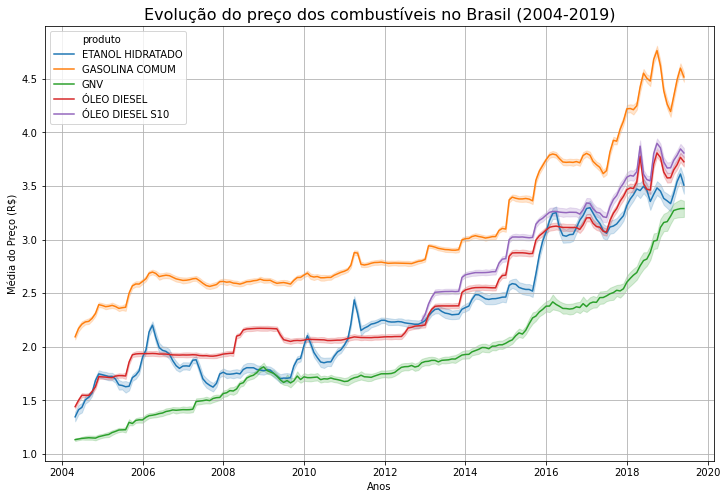

In [127]:
#Evolução do preço dos combustíveis no Brasil em todo o período.
plt.figure(figsize = [12,8])
sb.lineplot(data = gas[gas.produto!="GLP"], x = 'data_base', y = 'preco_medio_revenda', hue = 'produto')
plt.grid(True);
plt.xlabel('Anos'),plt.ylabel('Média do Preço (R$)')
plt.title('Evolução do preço dos combustíveis no Brasil (2004-2019)', fontsize =16);
plt.xticks(np.arange(start = np.datetime64("2004-05-01"), stop = np.datetime64("2019-06-01"), step = timedelta(years = 2)));

TypeError: 'years' is an invalid keyword argument for __new__()

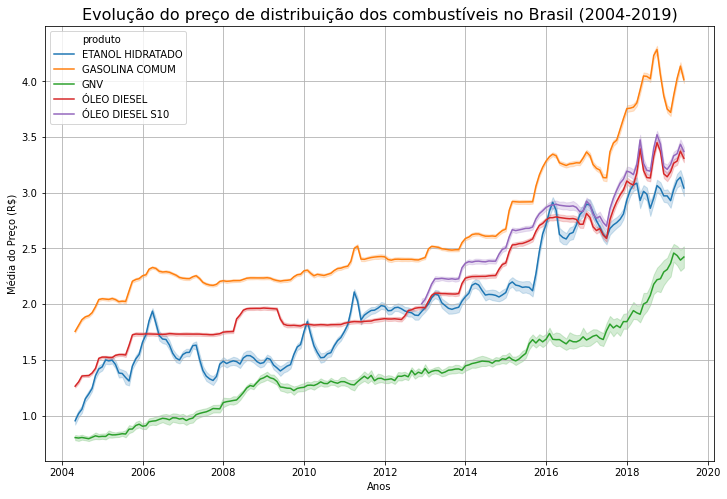

In [50]:
#Evolução do preço  de distribuição dos combustíveis no Brasil em todo o período.

plt.figure(figsize = [12,8])
sb.lineplot(data = gas[gas.produto!="GLP"], x = 'data_base', y = 'preco_medio_distribuicao', hue = 'produto')
plt.grid(True);
plt.xlabel('Anos'),plt.ylabel('Média do Preço (R$)')
plt.title('Evolução do preço de distribuição dos combustíveis no Brasil (2004-2019)', fontsize =16);
plt.xticks(np.arange(start = np.datetime64("2004-05-01"), stop = np.datetime64("2019-06-01"),step = timedelta(years = 2)));


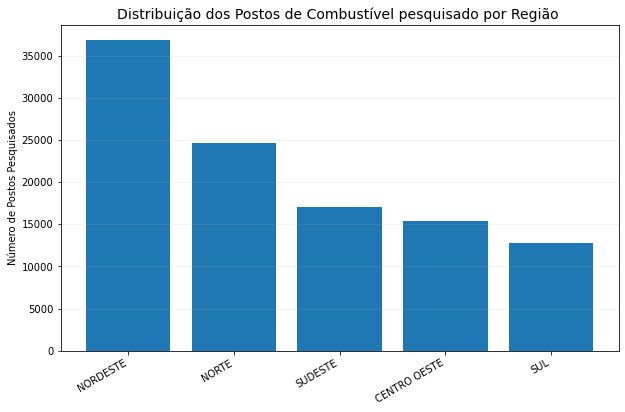

In [51]:
#Analisando o número de observações em cada região

posto_analise = gas.regiao.value_counts() #criando um df a partir da contagem dos valores por região
label = posto_analise.index.tolist()  #criando uma lista com os nomes das regiões
value = posto_analise.tolist() #outra lista com os valores de cada região. 

plt.figure(figsize = (10,6))
plt.bar(label, value)
plt.title('Distribuição dos Postos de Combustível pesquisado por Região ', fontsize = 14)
plt.xticks(rotation = 30,ha='right')
plt.ylabel('Número de Postos Pesquisados')
plt.grid(True, axis = 'y', alpha = 0.2)

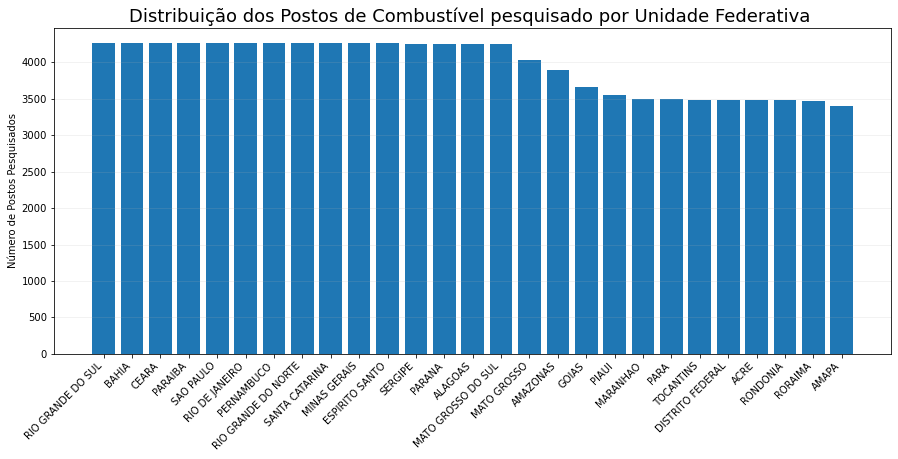

In [52]:
#Analisando o número de observações em cada estado

posto_analise_regiao = gas.estado.value_counts() #criando um df a partir da contagem dos valores por estado
label = posto_analise_regiao.index.tolist()  #criando uma lista com os nomes dos estados
value = posto_analise_regiao.tolist() #outra lista com os valores de cada estado. 

plt.figure(figsize = (15,6))
plt.bar(label, value)
plt.title('Distribuição dos Postos de Combustível pesquisado por Unidade Federativa ', fontsize = 18)
plt.xticks(rotation = 45, ha='right')
plt.ylabel('Número de Postos Pesquisados')
plt.grid(True, axis = 'y', alpha = 0.2)

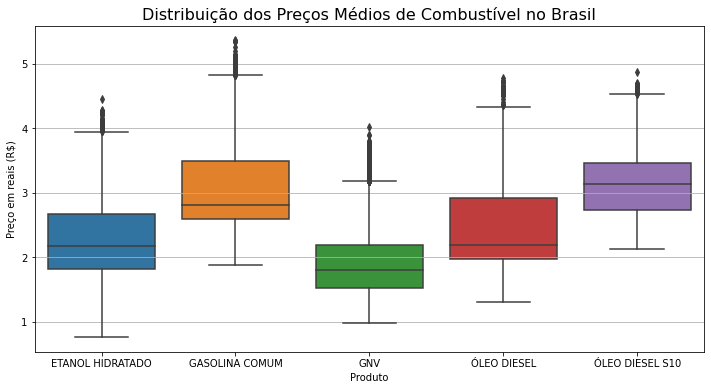

In [53]:
#Boxplot dos preços 

plt.figure(figsize = (12,6))
sb.boxplot(data = gas[gas.produto!="GLP"], x = 'produto', y = 'preco_medio_revenda');
plt.title('Distribuição dos Preços Médios de Combustível no Brasil',fontsize = 16)
plt.xlabel('Produto')
plt.ylabel('Preço em reais (R$)')
plt.grid(True, axis = 'y');

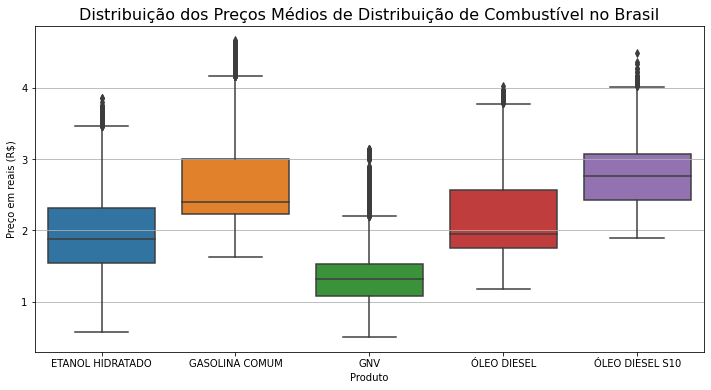

In [54]:
#Boxplot dos preços de distribuição

plt.figure(figsize = (12,6))
sb.boxplot(data = gas[gas.produto!="GLP"], x = 'produto', y = 'preco_medio_distribuicao');
plt.title('Distribuição dos Preços Médios de Distribuição de Combustível no Brasil',fontsize = 16)
plt.xlabel('Produto')
plt.ylabel('Preço em reais (R$)')

plt.grid(True, axis = 'y');

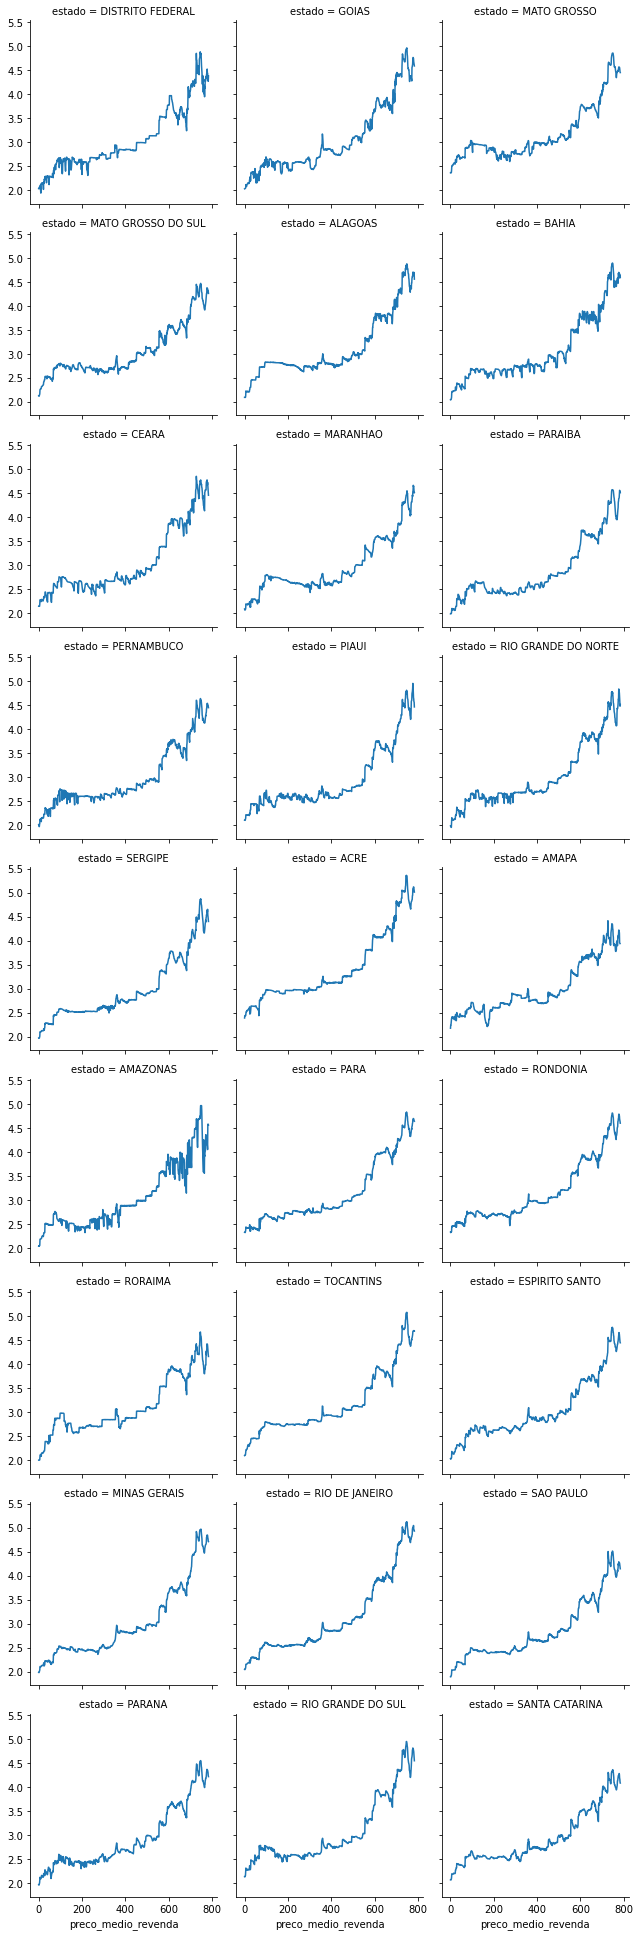

In [55]:
#Analisando a evolução de preço médio de gasolina por estado no período de 2004 a 2019.

g = sb.FacetGrid(data = gas[gas.produto == "GASOLINA COMUM"], col = 'estado', col_wrap = 3 );
g.map(plt.plot,'preco_medio_revenda');

## Sources and Inspiration: 

https://www.kaggle.com/gclindsey/geospatial-analysis-of-gas-prices-in-brazil

https://www.youtube.com/watch?v=fckFWZ_dLg4